## Titanic Data Insights

1083_dpk02718_04_t3d-4k-004.avif

## Load Dataset

In [18]:
import pandas as pd

df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Basic info & Missing values

In [19]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## Data Cleaning and handling

In [20]:
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


/tmp/ipython-input-3909248170.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(), inplace=True)
/tmp/ipython-input-3909248170.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

## Feature Engineering

In [21]:
df["Cabin"] = df["Cabin"].fillna("Unknown")
df["Deck"] = df["Cabin"].str[0]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,U


In [22]:
df['Deck'].value_counts()

,count
Deck,
U,687
C,59
B,47
D,33
E,32
A,15
F,13
G,4
T,1


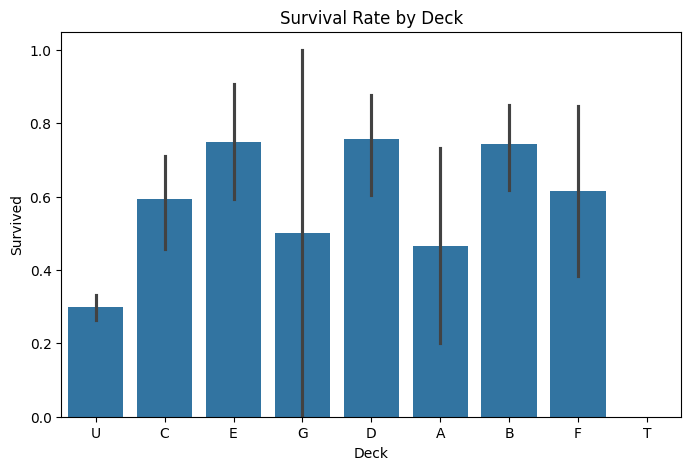

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(x="Deck", y="Survived", data=df)
plt.title("Survival Rate by Deck")
plt.show()

## Encoding Categorical Variables

In [24]:
df["Title"] = df["Name"].str.split(",").str[1].str.split(".").str[0].str.strip()
df['Title'] = df['Title'].replace(['Mlle','Ms'], 'Miss')
df['Title'] = df['Title'].replace(['Mme'], 'Mrs')
df['Title'] = df['Title'].replace(['Dr','Rev','Col','Major','Capt','Lady','Sir','Don','Jonkheer','the Countess','Dona'], 'Rare')

In [25]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

In [26]:
df['AgeBin'] = pd.cut(df['Age'], bins=[0,12,18,35,60,80], labels=['Child','Teen','Adult','MiddleAge','Senior'])

In [27]:
df = pd.get_dummies(df, columns=['Sex','Embarked','Deck','Title','AgeBin'], drop_first=True)

## Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_features = ['Age','Fare','SibSp','Parch']
df[num_features] = scaler.fit_transform(df[num_features])

## Final Dataset Check

In [29]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Deck_T,Deck_U,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,AgeBin_Teen,AgeBin_Adult,AgeBin_MiddleAge,AgeBin_Senior
0,1,0,3,"Braund, Mr. Owen Harris",-0.592481,0.432793,-0.473674,A/5 21171,-0.502445,Unknown,...,False,True,False,True,False,False,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.638789,0.432793,-0.473674,PC 17599,0.786845,C85,...,False,False,False,False,True,False,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",-0.284663,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,Unknown,...,False,True,True,False,False,False,False,True,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.407926,0.432793,-0.473674,113803,0.420730,C123,...,False,False,False,False,True,False,False,True,False,False
4,5,0,3,"Allen, Mr. William Henry",0.407926,-0.474545,-0.473674,373450,-0.486337,Unknown,...,False,True,False,True,False,False,False,True,False,False


# **The Data is ready for modeling**